### **1. Describe your dataset**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Import Pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load data
data = pd.read_csv("/content/uganda-census-population-counts-and-projects-2002-2021.csv")
data.head()

,District,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Kalangala,34766.0,54293.0,55900.0,58100.0,60300.0,62500.0,64800.0,67200.0,69500.0
1,Kampala,1189142.0,1507080.0,1529400.0,1559700.0,1590100.0,1620600.0,1650800.0,1680600.0,1709900.0
2,Kiboga,108897.0,148218.0,151200.0,155100.0,159100.0,163100.0,167100.0,171200.0,175200.0
3,Luwero,341317.0,456958.0,465500.0,476900.0,488500.0,500200.0,511900.0,523600.0,535200.0
4,Masaka,228170.0,297004.0,301900.0,308600.0,315400.0,322200.0,328900.0,335700.0,342300.0


In [ ]:
# variables
data.columns

Index(['District', '2013', '2014', '2015', '2016', '2017', '2018', '2019',
       '2020', '2021'],
      dtype='object')

In [ ]:
# number of rows, columns and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   District  136 non-null    object 
 1   2013      135 non-null    float64
 2   2014      135 non-null    float64
 3   2015      135 non-null    float64
 4   2016      135 non-null    float64
 5   2017      135 non-null    float64
 6   2018      135 non-null    float64
 7   2019      135 non-null    float64
 8   2020      135 non-null    float64
 9   2021      127 non-null    float64
dtypes: float64(9), object(1)
memory usage: 10.8+ KB


In [ ]:
# Display basic statistics
print(data.describe())

               2013          2014          2015          2016          2017  \
count  1.350000e+02  1.350000e+02  1.350000e+02  1.350000e+02  1.350000e+02   
mean   1.802069e+05  2.582921e+05  2.629785e+05  2.715015e+05  2.802881e+05   
std    1.410926e+05  2.259525e+05  2.327350e+05  2.438523e+05  2.558181e+05   
min    3.476600e+04  4.306100e+04  4.380000e+04  4.490000e+04  4.610000e+04   
25%    1.076165e+05  1.476920e+05  1.490500e+05  1.545500e+05  1.594000e+05   
50%    1.559350e+05  2.101730e+05  2.178000e+05  2.220000e+05  2.303000e+05   
75%    2.058130e+05  2.912720e+05  2.988000e+05  3.079000e+05  3.164500e+05   
max    1.189142e+06  1.997418e+06  2.107500e+06  2.250000e+06  2.402800e+06   

               2018          2019          2020          2021  
count  1.350000e+02  1.350000e+02  1.350000e+02  1.270000e+02  
mean   2.893259e+05  2.985778e+05  3.080267e+05  3.353811e+05  
std    2.685118e+05  2.820769e+05  2.964121e+05  3.203353e+05  
min    4.710000e+04  4.810000e+0

In [ ]:
# Check for null values
null_values = data.isnull().sum()
print(null_values)

District     1
2013         2
2014         2
2015         2
2016         2
2017         2
2018         2
2019         2
2020         2
2021        10
dtype: int64


### **2. Get descriptive analytics (central tendency and spread, percentiles, max and min) of the dataset.**

In [ ]:
# Calculate correlations between columns
correlation_matrix = data.corr()
print(correlation_matrix)

          2013      2014      2015      2016      2017      2018      2019  \
2013  1.000000  0.945800  0.936477  0.926907  0.916647  0.905905  0.894617   
2014  0.945800  1.000000  0.997518  0.996353  0.994433  0.991813  0.988505   
2015  0.936477  0.997518  1.000000  0.999623  0.998493  0.996650  0.994104   
2016  0.926907  0.996353  0.999623  1.000000  0.999623  0.998518  0.996704   
2017  0.916647  0.994433  0.998493  0.999623  1.000000  0.999636  0.998556   
2018  0.905905  0.991813  0.996650  0.998518  0.999636  1.000000  0.999642   
2019  0.894617  0.988505  0.994104  0.996704  0.998556  0.999642  1.000000   
2020  0.882933  0.984562  0.990913  0.994229  0.996800  0.998593  0.999654   
2021  0.868462  0.978045  0.981409  0.985406  0.988634  0.991071  0.992768   

          2020      2021  
2013  0.882933  0.868462  
2014  0.984562  0.978045  
2015  0.990913  0.981409  
2016  0.994229  0.985406  
2017  0.996800  0.988634  
2018  0.998593  0.991071  
2019  0.999654  0.992768  
202

<ipython-input-7-24b2f18f98fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


In [ ]:
# Correcting percentiles to be between 0 and 1
percentiles = [0.25, 0.5, 0.75]
percentile_values = data.describe(percentiles=percentiles).loc[['25%', '50%', '75%']]
# Display results
print("Percentiles:\n", percentile_values)

Percentiles:
          2013      2014      2015      2016      2017      2018      2019  \
25%  107616.5  147692.0  149050.0  154550.0  159400.0  164450.0  169200.0   
50%  155935.0  210173.0  217800.0  222000.0  230300.0  238900.0  245600.0   
75%  205813.0  291272.0  298800.0  307900.0  316450.0  324650.0  335300.0   

         2020      2021  
25%  172500.0  197400.0  
50%  250600.0  269900.0  
75%  346950.0  376250.0  


### **3. Visualizations**

**Univariate Visualizations**

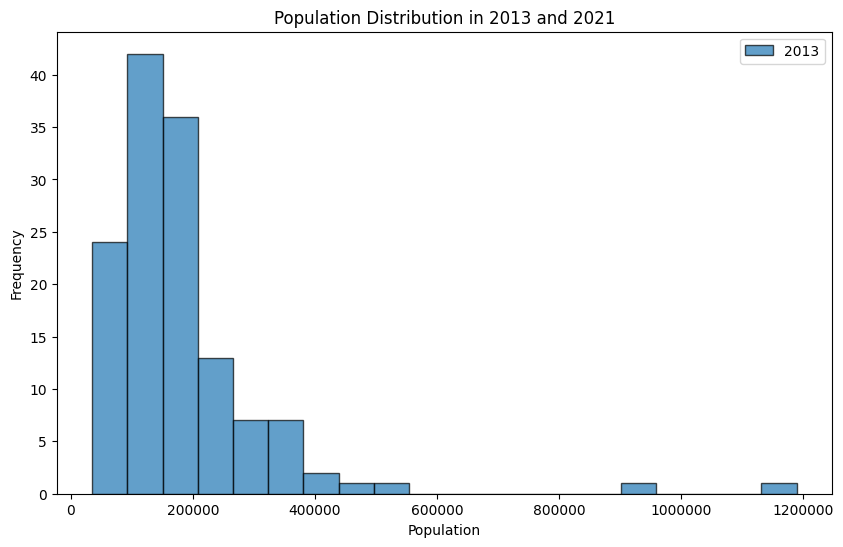

In [ ]:
# histograms
plt.figure(figsize=(10, 6))
plt.hist(data['2013'], bins=20, alpha=0.7, label='2013', edgecolor = 'black')
plt.ticklabel_format(style='plain')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.legend()
plt.title('Population Distribution in 2013')
plt.show()


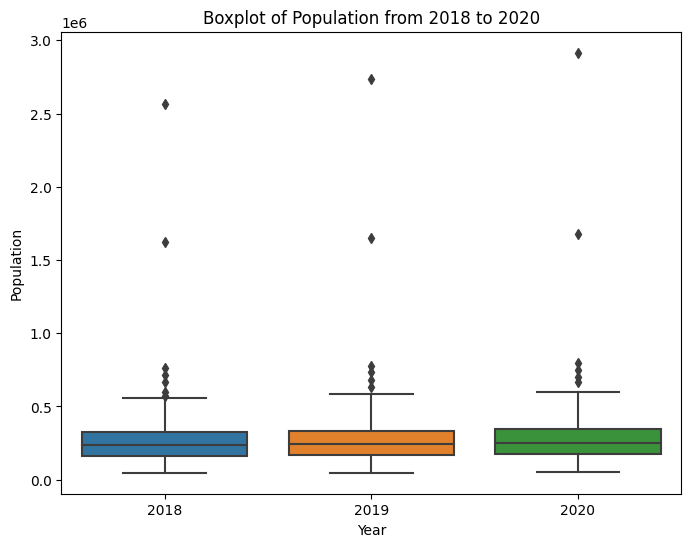

In [ ]:
# box plots
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['2018', '2019', '2020']])
plt.title('Boxplot of Population from 2018 to 2020')
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()


**Multivariate Visualizations**

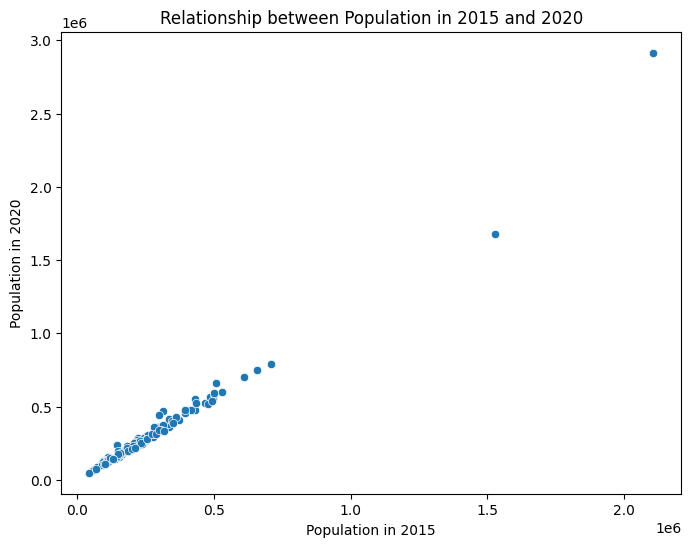

In [ ]:
# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='2015', y='2020', data=data)
plt.title('Relationship between Population in 2015 and 2020')
plt.xlabel('Population in 2015')
plt.ylabel('Population in 2020')
plt.show()


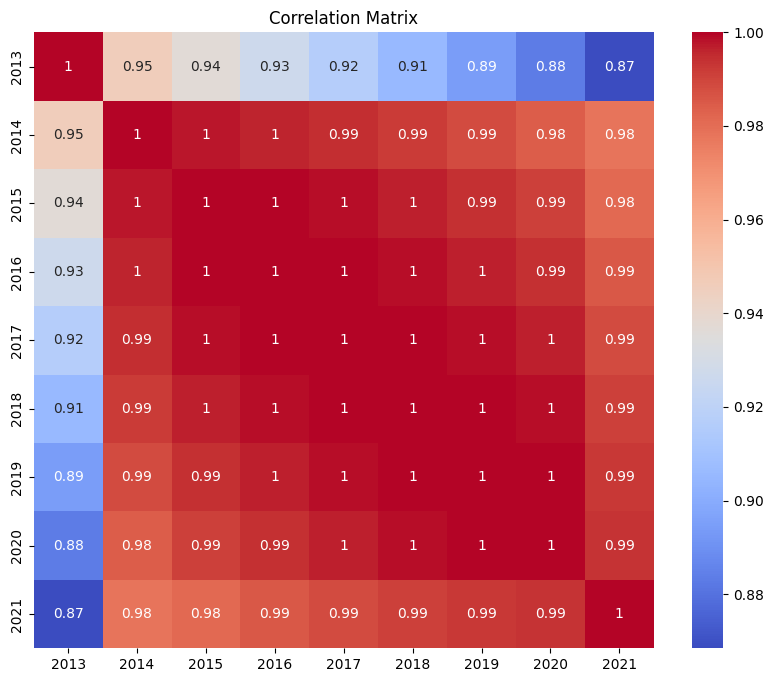

In [ ]:
# heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()